<a href="https://colab.research.google.com/github/akanksharai0407/FASHION-ITEM-CLASSIFICATION-USING-MACHINE-LEARNING-MODELS/blob/main/Fashion_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### FASHION ITEM CLASSIFICATION USING MACHINE LEARNING MODELS

In [ ]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from skimage.feature import hog

import torch
from torchvision.datasets import FashionMNIST
from torchvision import transforms

In [ ]:
# Load FashionMNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_data = FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_data = FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Combine train and test sets
X = torch.cat([train_data.data, test_data.data], dim=0).numpy()
y = torch.cat([train_data.targets, test_data.targets], dim=0).numpy()

print("Total samples:", X.shape[0])
print("Each image shape:", X[0].shape)

Total samples: 70000
Each image shape: (28, 28)


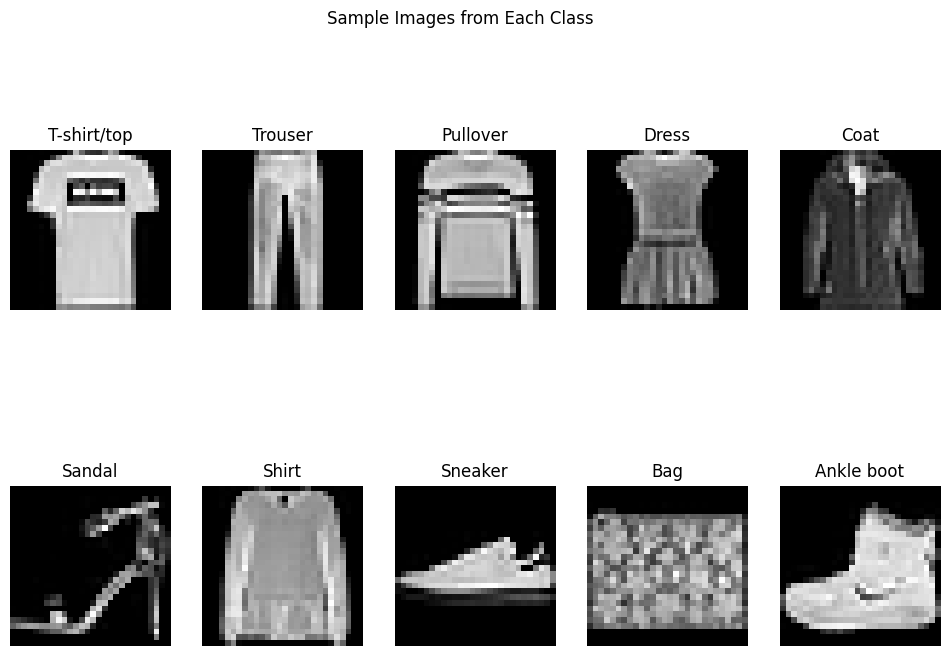

In [ ]:
# sample images from each class
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(12, 8))
for label in range(10):
    idx = np.where(y == label)[0][0]
    plt.subplot(2, 5, label + 1)
    plt.imshow(X[idx], cmap='gray')
    plt.title(class_names[label])
    plt.axis('off')
plt.suptitle("Sample Images from Each Class")
plt.show()

In [ ]:
# Convert images to flat pixel vectors for basic preview
X_preview = X.reshape((X.shape[0], -1))
df = pd.DataFrame(X_preview)
df['label'] = y

In [ ]:
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print("Dataset shape:", df.shape)
print("Missing values:", df.isnull().sum().sum())

Dataset shape: (70000, 785)
Missing values: 0


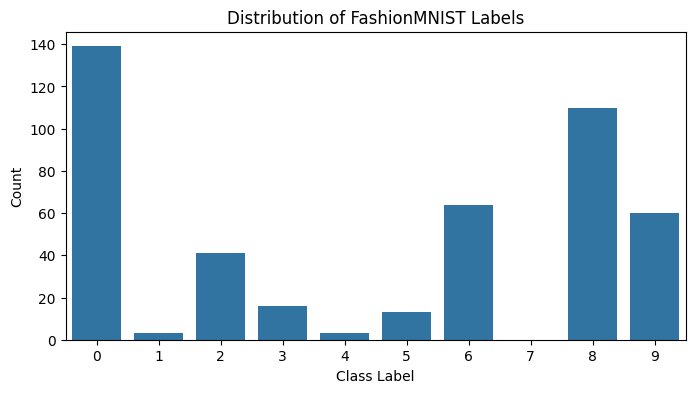

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='label', data=df)
plt.title("Distribution of FashionMNIST Labels")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

In [ ]:
# HOG feature extraction
hog_features = []
for image in tqdm(X):
    features = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')
    hog_features.append(features)

hog_features = np.array(hog_features)
print("HOG feature shape:", hog_features.shape)

100%|██████████| 70000/70000 [00:20<00:00, 3393.19it/s]


HOG feature shape: (70000, 144)


In [ ]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(hog_features, y, test_size=0.2, random_state=42)
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 56000
Test set size: 14000


K-Nearest Neighbors (KNN)

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79      1394
           1       0.93      0.97      0.95      1402
           2       0.69      0.69      0.69      1407
           3       0.85      0.82      0.83      1449
           4       0.62      0.72      0.67      1357
           5       0.96      0.86      0.91      1449
           6       0.59      0.49      0.54      1407
           7       0.84      0.93      0.88      1359
           8       0.98      0.94      0.96      1342
           9       0.94      0.95      0.94      1434

    accuracy                           0.82     14000
   macro avg       0.82      0.82      0.82     14000
weighted avg       0.82      0.82      0.82     14000

KNN Confusion Matrix:


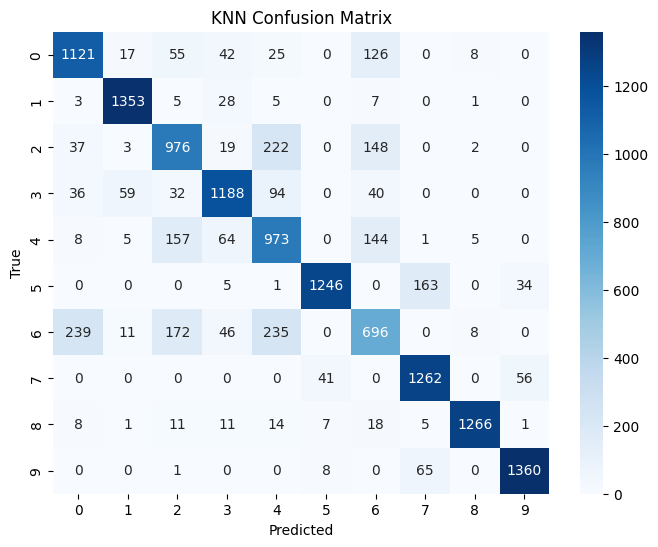

In [ ]:
# K-Nearest Neighbors (K=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

print("KNN Classification Report:")
print(classification_report(y_test, knn_preds))

print("KNN Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, knn_preds), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

SVM (Linear Kernel)

SVM (Linear) Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      1394
           1       0.96      0.95      0.96      1402
           2       0.72      0.68      0.70      1407
           3       0.83      0.85      0.84      1449
           4       0.68      0.73      0.71      1357
           5       0.93      0.93      0.93      1449
           6       0.56      0.49      0.52      1407
           7       0.90      0.91      0.91      1359
           8       0.96      0.96      0.96      1342
           9       0.95      0.95      0.95      1434

    accuracy                           0.83     14000
   macro avg       0.83      0.83      0.83     14000
weighted avg       0.83      0.83      0.83     14000

SVM (Linear) Confusion Matrix:


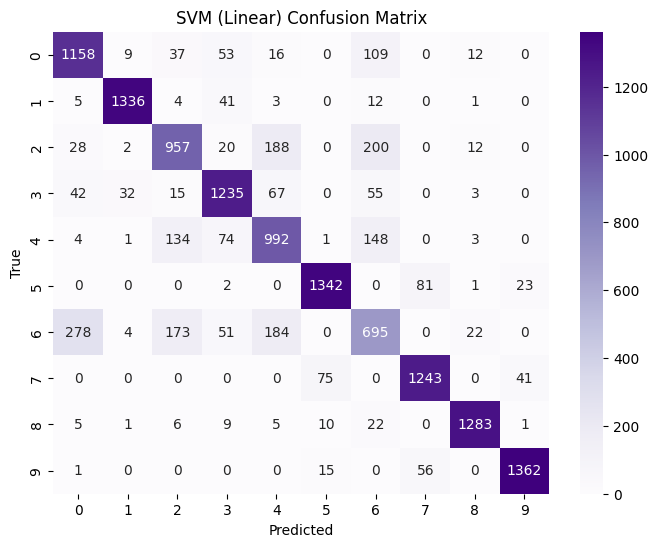

In [ ]:
# SVM with Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
svm_linear_preds = svm_linear.predict(X_test)

print("SVM (Linear) Classification Report:")
print(classification_report(y_test, svm_linear_preds))

print("SVM (Linear) Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, svm_linear_preds), annot=True, fmt='d', cmap='Purples')
plt.title("SVM (Linear) Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

SVM (RBF Kernel)

SVM (RBF) Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1394
           1       0.98      0.96      0.97      1402
           2       0.79      0.75      0.77      1407
           3       0.85      0.88      0.86      1449
           4       0.71      0.76      0.73      1357
           5       0.94      0.93      0.94      1449
           6       0.63      0.58      0.60      1407
           7       0.91      0.93      0.92      1359
           8       0.97      0.97      0.97      1342
           9       0.96      0.95      0.95      1434

    accuracy                           0.85     14000
   macro avg       0.85      0.85      0.85     14000
weighted avg       0.85      0.85      0.85     14000

SVM (RBF) Confusion Matrix:


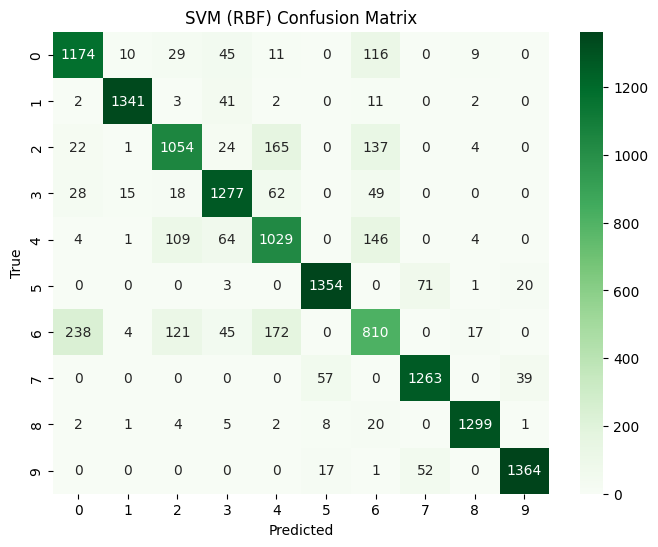

In [ ]:
# SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
svm_rbf_preds = svm_rbf.predict(X_test)

print("SVM (RBF) Classification Report:")
print(classification_report(y_test, svm_rbf_preds))

print("SVM (RBF) Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, svm_rbf_preds), annot=True, fmt='d', cmap='Greens')
plt.title("SVM (RBF) Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Random Forest

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      1394
           1       0.98      0.94      0.96      1402
           2       0.73      0.72      0.73      1407
           3       0.83      0.86      0.85      1449
           4       0.66      0.74      0.70      1357
           5       0.92      0.92      0.92      1449
           6       0.60      0.50      0.55      1407
           7       0.89      0.89      0.89      1359
           8       0.94      0.96      0.95      1342
           9       0.94      0.94      0.94      1434

    accuracy                           0.83     14000
   macro avg       0.83      0.83      0.83     14000
weighted avg       0.83      0.83      0.83     14000

Random Forest Confusion Matrix:


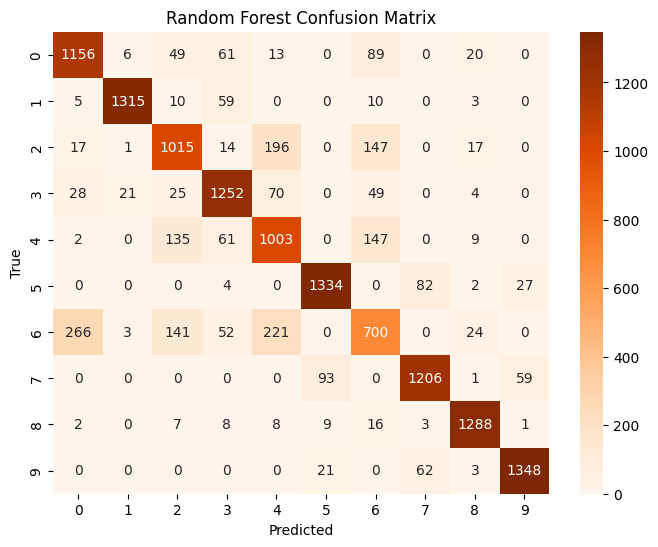

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))

print("Random Forest Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Oranges')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
# Create accuracy summary table
from sklearn.metrics import accuracy_score

accuracy_scores = {
    "KNN": accuracy_score(y_test, knn_preds),
    "SVM (Linear)": accuracy_score(y_test, svm_linear_preds),
    "SVM (RBF)": accuracy_score(y_test, svm_rbf_preds),
    "Random Forest": accuracy_score(y_test, rf_preds)
}

summary_df = pd.DataFrame.from_dict(accuracy_scores, orient='index', columns=["Accuracy"])
summary_df = summary_df.sort_values(by="Accuracy", ascending=False)

print("Model Accuracy Summary:")
display(summary_df)

Model Accuracy Summary:


,Accuracy
SVM (RBF),0.854643
Random Forest,0.829786
SVM (Linear),0.828786
KNN,0.817214


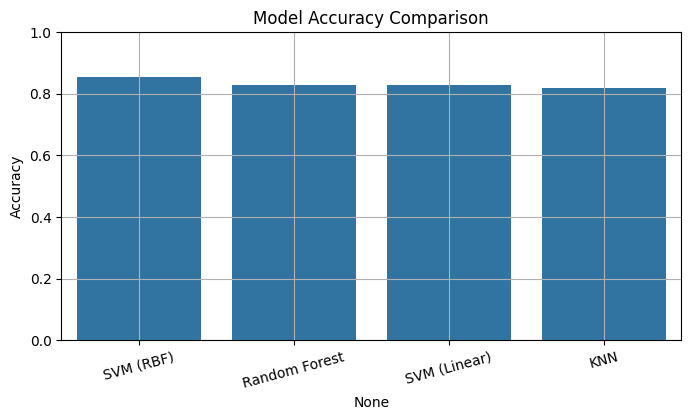

In [ ]:
# Accuracy bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x=summary_df.index, y=summary_df["Accuracy"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.grid(True)
plt.show()

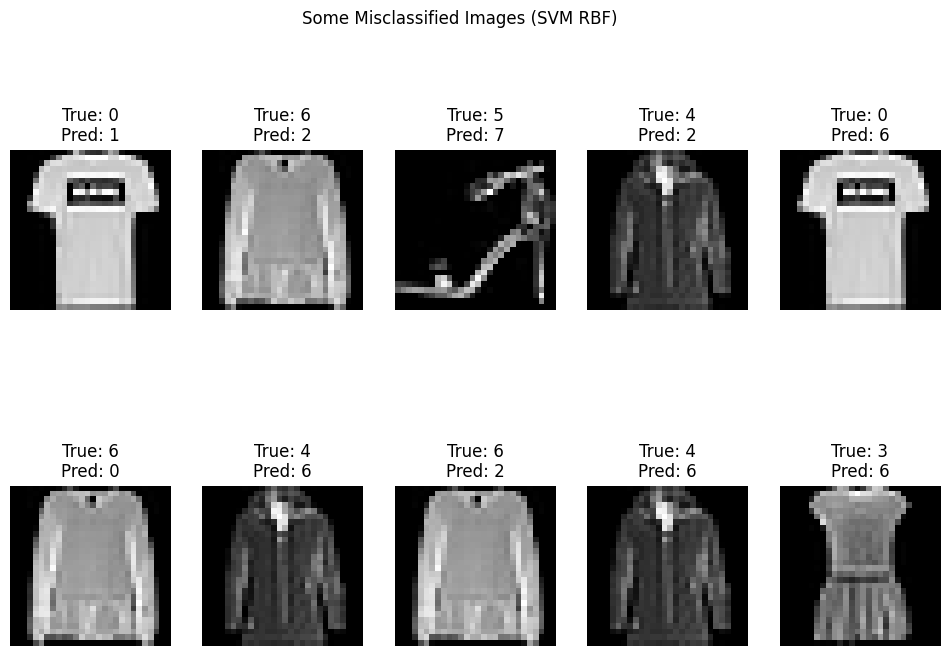

In [ ]:
# misclassified examples from best model (SVM RBF)
wrong_idx = np.where(y_test != svm_rbf_preds)[0]

plt.figure(figsize=(12, 8))
for i in range(10):
    idx = wrong_idx[i]
    # Get the original 28x28 image using index from raw X
    raw_idx = list(y).index(y_test[idx])  # find the corresponding image index
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[raw_idx], cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {svm_rbf_preds[idx]}")
    plt.axis('off')
plt.suptitle("Some Misclassified Images (SVM RBF)")
plt.show()